# shot_mapping.ipynb
Visualizing XG with heatmaps.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from hockey_rink import NHLRink
# TODO: Update environment with scipy + NHLRink

In [3]:
shot_data = pd.read_csv('../../data/shots/shots_2015-2023.csv')

# NOTE: May add filter to include other seasons (+playoffs). Only including 2023 regular season for now
shot_data = shot_data[shot_data['season'] == 2023] # 2023-24 season
shot_data = shot_data[shot_data['isPlayoffGame'] == 0] # Exclude playoffs

# NOTE: Currently working with 5on5. May modify to include filter for different strength situations
shot_data = shot_data[shot_data['shotOnEmptyNet'] == 0] # Exclude empty net
shot_data = shot_data[(shot_data['awaySkatersOnIce'] == 5) & (shot_data['homeSkatersOnIce'] == 5)]
shot_data = shot_data[shot_data['xCordAdjusted'] <= 89]

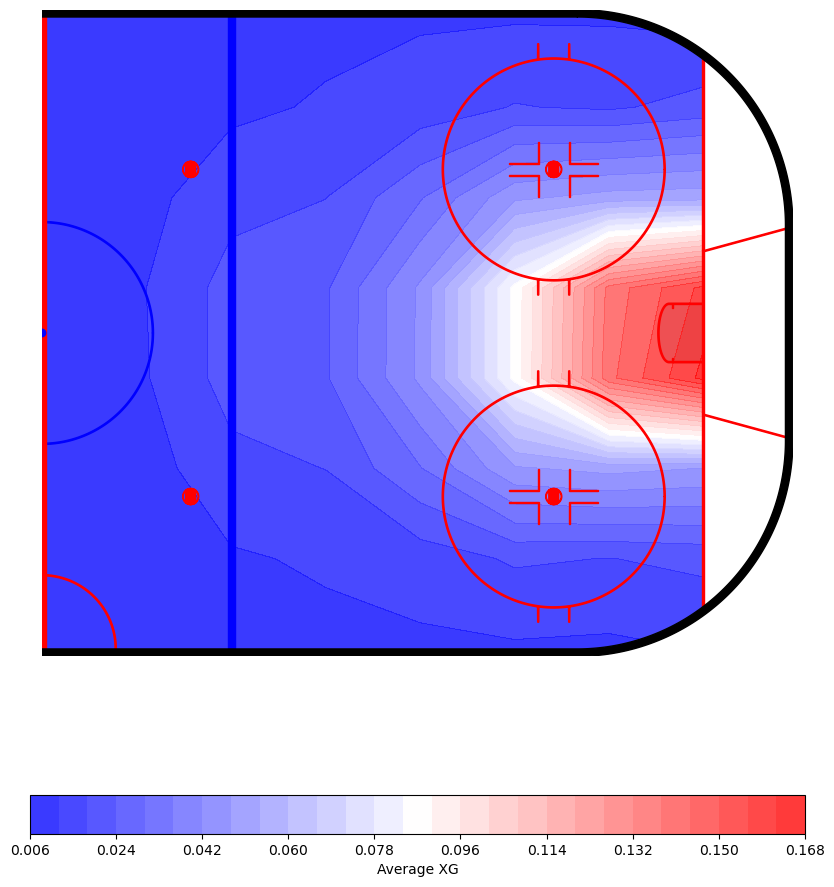

In [4]:
# League Wide XG.
fig, ax = plt.subplots(1,1, figsize=(10,12), facecolor='w', edgecolor='k')

rink = NHLRink(net={"visible": False})
contour = rink.contourf(
     "xCordAdjusted", "yCordAdjusted", "xGoal", data=shot_data, 
     nbins=8, levels=30, plot_range="offense", cmap="bwr", alpha=0.8, plot_xlim=(0, 89),
     ax=ax, draw_kw={"display_range": "offense"}
)

# Add colorbar
cbar = fig.colorbar(contour, ax=ax, orientation="horizontal")
cbar.set_label("Average XG")

In [5]:
# TODO: Frontend with dynamic player name selection
player_name = 'Auston Matthews'
player_shots = shot_data[shot_data['shooterName'] == player_name]

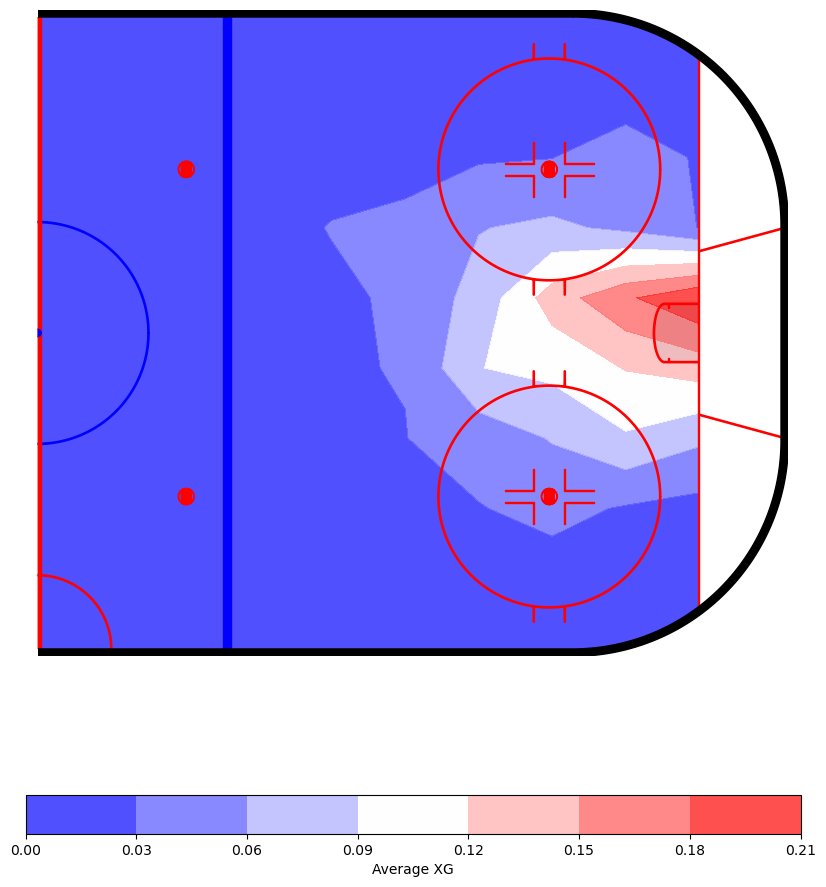

In [6]:
# NOTE: This is a plot of Auston Matthews XG. Coordinates seem weird.
fig, ax = plt.subplots(1,1, figsize=(10,12), facecolor='w', edgecolor='k')

rink = NHLRink(net={"visible": False})


contour = rink.contourf(
     "xCordAdjusted", "yCordAdjusted", "xGoal", data=player_shots, 
     cmap="bwr", alpha=0.8, plot_xlim=(0, 89),
     plot_range="offense", ax=ax, draw_kw={"display_range": "offense"}
)

# Add colorbar
cbar = fig.colorbar(contour, ax=ax, orientation="horizontal")
cbar.set_label("Average XG")

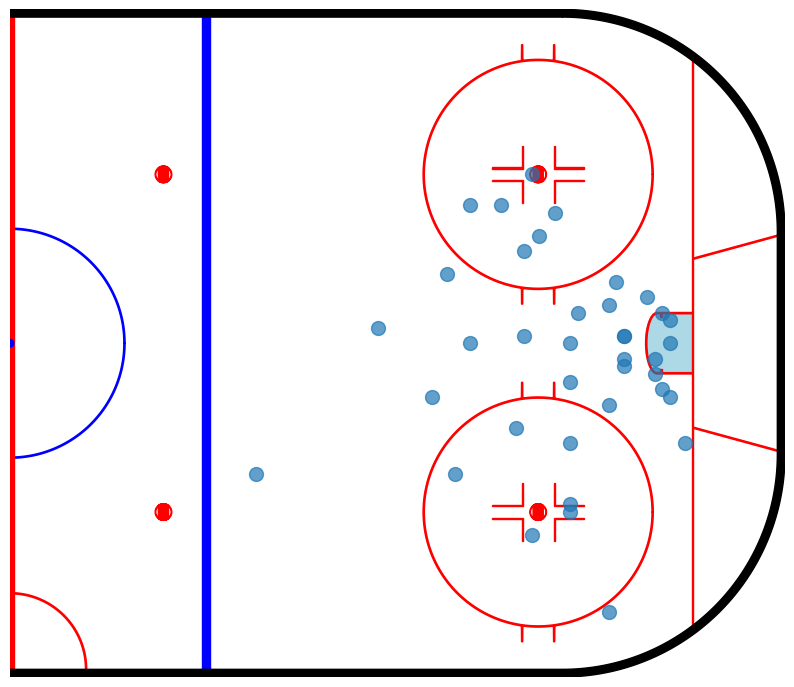

In [7]:
# Scatter plot of Auston Matthews goals
fig, ax = plt.subplots(1,1, figsize=(10,12), facecolor='w', edgecolor='k')

# NOTE: INCLUDING GOALS ONLY
player_shots = player_shots[player_shots["goal"] == 1]

rink = NHLRink(net={"visible": False})

scatter = rink.scatter(
     "xCordAdjusted", "yCordAdjusted", data=player_shots,
     plot_range="offense", s=100, alpha=0.7, plot_xlim=(0, 89),
     ax=ax, draw_kw={"display_range": "offense"},
)

In [8]:
# TODO: Plot XG vs league, goals scored above XG, add player name + other info to plot
# TODO: Modify charts for shot type